# Collecting and preparing data
## 1. Collecting data from the internet
### 1.1 Web scraping
The internet contains a wealth of data for your Natural Language Processing (NLP) projects. However, the data are usually not ready to be used for NLP projects, as they are not packaged in word document or spreadsheet that can be easily downloadable and further processed. Therefore, we have to learn to collect and process our own data. 

In this exercise, we will learn how to collect raw data from websites using a process known as 'web scraping'. We will build a web scraper that will collect information websites of your choice!  

### 1.1.1 Importing required libraries/ packages
First, we import the packages that are required: 
- The `requests` package allows our python script to communicate with websites and to 'request' information from those sites. 
- The beautiful soup package, also known as `bs4` takes the raw information from the websites and provides helpful functions to extract information.

In [2]:
import requests
import bs4

print ("You have successfully imported requests version "+requests.__version__)
print ("You have successfully imported beautifulsoup version "+bs4.__version__)

You have successfully imported requests version 2.32.3
You have successfully imported beautifulsoup version 4.12.3


Yay! Your packages are imported! Now, we are ready to start scraping some websites!

### 1.1.2 Finding out information about a website

Now, visit http://www.sl2square.org/case-studies/ to have a look at Sustainable Living Lab's case studies. 

Once the page is shown, press **ctrl-shift-i (or F12) to look at the HTML of the site.** 
*Note: HTML stands for Hypertext Markup Language and it is a way for your computer browser (like chrome, internet explorer, safari) to understand how information should be displayed. 

When you visit a website, your computer uses HTML to send a request (called the 'GET' request) to the internet and waits for a response. The response eventually comes with a response code, and possibly the information requested which is then displayed on your computer browser.  

### Task: Visit [http://www.sl2square.org/case-studies/](http://www.sl2square.org/case-studies/) and press ctrl-shift-i (or F12) now! 

### **UPDATE**

The previous webpage is unavailable. I changed it to [https://www.sustainablelivinglab.org](https//:www.sustainablelivinglab.org) as per instruction.

**There are no information to be scraped from [https://www.sustainablelivinglab.org](https//:www.sustainablelivinglab.org), so I selected the case study for, Maryville University as an alternative at: [https://online.maryville.edu/blog/what-is-sustainable-living/](https://online.maryville.edu/blog/what-is-sustainable-living/)

Pay close attention to anything you see within < angular brackets >. These tags tell the browser where and how to display the information contained within. Tags are used to identify sections of the web page, and we will be using these tags later to locate pieces of information we are interested in. 

### Task: Can you identify the various tags by looking at the HTML code?
  
Use the `requests.get function()` to call on the website. The `request.get()` function sends a 'GET' request to the website address and attempts to retrieve a response. The `request.get()` function should return 'Response [200]'. This means that we have successfully received information from the site.

In [3]:
base_url = 'https://online.maryville.edu/blog/what-is-sustainable-living/'
r = requests.get(base_url)
r

<Response [200]>

### Task: Try changing the base_url from 'http://www.sl2square.org/case-studies/' to 'http://www.sl2square.org/wrong-address/'. 
What did the response code become? 

These codes can help in troubleshooting and solving connection problems, but now, we just need to know that a response of 200 means that your GET request was successful!

Connection establised! We have access!

### 1.1.3 Using beautifulsoup to get data from websites

Now we can use `bs4` to read the outputs from our request. 

Beautiful Soup is a Python library for getting data out of HTML, XML, and other markup languages.
*Note: This section of the Jupyter Notebook is written in 'markup' format.

Much like our browser, bs4 is able to understand HTML and to read the < tags >;

See the code below!

#### This is the old code:

In [4]:
'''
#`r.text` contains the raw HTML returned when we made our GET request earlier. 
#`'html5lib'` tells BeautifulSoup that it is reading HTML information. 
soup = bs4.BeautifulSoup(r.text,'html5lib')
'''

"\n#`r.text` contains the raw HTML returned when we made our GET request earlier. \n#`'html5lib'` tells BeautifulSoup that it is reading HTML information. \nsoup = bs4.BeautifulSoup(r.text,'html5lib')\n"

#### This is my code:

In [5]:
# Install the html5lib, lxml, and beautifulsoup4 libraries
%pip install html5lib lxml beautifulsoup4

# The above line ensures that the html5lib, lxml, and beautifulsoup4 libraries are installed.
# lxml is an alternative parser for parsing HTML content using BeautifulSoup.

# `r.text` contains the raw HTML returned when we made our GET request earlier. 
# 'lxml' tells BeautifulSoup that it is reading HTML information. 
soup = bs4.BeautifulSoup(r.text,'lxml')

Note: you may need to restart the kernel to use updated packages.


Essentially, we are taking the raw response from the GET request, and asking BeautifulSoup to read and understand the response, and store all of this as your variable `soup`!

### 1.1.4 Using beautifulsoup to search for specific tags

This is where it gets interesting. BeautifulSoup can be used to search for specific tags. 

Let's use beautifulsoup to look for all the links within the SL2 website!

#### This is the old code:

In [6]:
'''
project_list = []
for url in soup.findAll("a", {"class": "entry-thumb"}):
    project_list.append(url.get('href'))
    print(url.get('href'))
'''

'\nproject_list = []\nfor url in soup.findAll("a", {"class": "entry-thumb"}):\n    project_list.append(url.get(\'href\'))\n    print(url.get(\'href\'))\n'

#### This is my code: 

In [8]:
# Extract links
project_list = []

for link in soup.find_all('a', href=True):
    project_list.append(link['href'])

# Display the contents of the project_list variable
print(project_list)

# Check if the information has been added into this variable
if project_list:
    print("Links have been successfully collected in the project_list.")
else:
    print("No links found in the project_list.")

['#main-body-content', '/', '/', '/choose-your-program/', 'https://online.maryville.edu/online-bachelors-degrees/', 'https://online.maryville.edu/online-masters-degrees/', 'https://online.maryville.edu/online-doctorate-degrees/', 'https://online.maryville.edu/online-certificates/', 'https://nursing.maryville.edu/?Access_Code=MVU-SUITE-SEO2&utm_campaign=MVU-SUITE-SEO2', 'https://online.maryville.edu/business-degrees/', 'https://online.maryville.edu/cybersecurity/', 'https://online.maryville.edu/human-services/', 'https://online.maryville.edu/science-mathematics/', 'https://online.maryville.edu/communication-degrees/', 'https://online.maryville.edu/education-degrees/', 'https://online.maryville.edu/liberal-arts-degrees/', 'https://online.maryville.edu/social-science-degrees/', 'https://online.maryville.edu/computer-science-degrees/', 'https://online.maryville.edu/healthcare-degrees/', 'https://nursing.maryville.edu/?Access_Code=MVU-SUITE-SEO2&utm_campaign=MVU-SUITE-SEO2', 'https://online

In this code snippet, we find all `<a>` tags with the class of 'entry-thumb'. We then loop through each tag found and extract the links by looking for 'href' tags.  

*Note: The `<a>` tag defines a [hyperlink](https://www.w3schools.com/tags/tag_a.asp), which links to information on different pages. To differentiate `<a>` tags appearing in different locations, they can be 'named' with a `class=tag-name`. In this exercise, the links we are searching for are located within the `<a>` tag, and is named 'entry-thumb'. We can thus search for all elements in the HTML with this tag and class, and to collect all links found, which is marked by the `href` keyword. 

Let us now see if we have managed to collect all the links in the `project_list`. Show the variable project_list and check if the information has been added into this variable!

#### My Code

In [9]:
# your code here:

# Check if the information has been added into this variable
if project_list:
    print("Links have been successfully collected in the project_list.")
else:
    print("No links found in the project_list.")

# Display the contents of the project_list variable

# Import the textwrap module
import textwrap

# Join the list into a single string with spaces as separators
joined_list = ' '.join(project_list)

# Wrap the text to a specified width
wrapped_text = textwrap.fill(joined_list, width=100)

# Print the wrapped text
print(wrapped_text)

Links have been successfully collected in the project_list.
#main-body-content / / /choose-your-program/ https://online.maryville.edu/online-bachelors-degrees/
https://online.maryville.edu/online-masters-degrees/ https://online.maryville.edu/online-doctorate-
degrees/ https://online.maryville.edu/online-certificates/
https://nursing.maryville.edu/?Access_Code=MVU-SUITE-SEO2&utm_campaign=MVU-SUITE-SEO2
https://online.maryville.edu/business-degrees/ https://online.maryville.edu/cybersecurity/
https://online.maryville.edu/human-services/ https://online.maryville.edu/science-mathematics/
https://online.maryville.edu/communication-degrees/ https://online.maryville.edu/education-degrees/
https://online.maryville.edu/liberal-arts-degrees/ https://online.maryville.edu/social-science-
degrees/ https://online.maryville.edu/computer-science-degrees/
https://online.maryville.edu/healthcare-degrees/ https://nursing.maryville.edu/?Access_Code=MVU-
SUITE-SEO2&utm_campaign=MVU-SUITE-SEO2 https://onlin

Now, we will extract the description of each project by (1) visiting each site in the list and (2) looking for the class with the content we are interested in. Let us see how it is done for one link, and you will write code to do it for all links later. 
  
Using the same method as before, visit the first link and press F12 to view page source. Select the element containing the main text and you will be able to see the element source on the panel. Note that the text is surrounded by < P > tags, and also note the class of the < div > tag above the text. We will be using this information to extract the text soon. Come, do that now!
  
Notice that on this page, the information is stored within a < div > tag, and it has been given the `class` of 'entry-content content'. We want to find all paragraphs within these divs, so we look for < P >  tags, and we call `.get_text()` to retrieve the actual words!

#### This is the old code:

In [10]:
'''
r = requests.get(project_list[0])
soup = bs4.BeautifulSoup(r.text, 'html5lib')
deet = soup.find('div', {'class': 'entry-content content'}) # Search for div tags of class 'entry-content content'
all_para = deet.findAll('p') # Within these tags, find all p tags

for para in all_para:
    print(para.text) # Print the text content of each paragraph
'''

"\nr = requests.get(project_list[0])\nsoup = bs4.BeautifulSoup(r.text, 'html5lib')\ndeet = soup.find('div', {'class': 'entry-content content'}) # Search for div tags of class 'entry-content content'\nall_para = deet.findAll('p') # Within these tags, find all p tags\n\nfor para in all_para:\n    print(para.text) # Print the text content of each paragraph\n"

#### My code:

In [11]:
from bs4 import BeautifulSoup

# Ensure the URL is absolute
url = project_list[0]
if not (url.startswith('http://') or url.startswith('https://')):
    url = base_url + url

# Fetch the webpage content
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html5lib')

# Search for div tags of class 'entry-content content'
deet = soup.find('div', {'class': 'entry-content content'})

# Check if the div was found
if deet is not None:
    # Within these tags, find all p tags
    all_para = deet.findAll('p')

    # Print the text content of each paragraph
    for para in all_para:
        print(para.text)
else:
    print("No div with class 'entry-content content' found.")

No div with class 'entry-content content' found.


Now that we can see how it is possible to extract text from a web page, it is your turn!  
### Task 1: Write a function that can loop through the urls in `project_list` and extract the description of each project as a string. Combine each string into a list called `project_text`

#### This is the old code:

In [22]:
'''
project_text=[]
for project in project_list:
    r = requests.get(project)
    soup = bs4.BeautifulSoup(r.text,'html5lib')
    deet = soup.find('div',{'class':'entry-content content'})
    all_para = deet.findAll('p')
    individual_proj=''
    for para in all_para:
        print(para.get_text())
        individual_proj+=para.get_text()
    project_text.append(# your code here)
'''

"\nproject_text=[]\nfor project in project_list:\n    r = requests.get(project)\n    soup = bs4.BeautifulSoup(r.text,'html5lib')\n    deet = soup.find('div',{'class':'entry-content content'})\n    all_para = deet.findAll('p')\n    individual_proj=''\n    for para in all_para:\n        print(para.get_text())\n        individual_proj+=para.get_text()\n    project_text.append(# your code here)\n"

#### My Code

In [24]:
project_text = []  # Initialize an empty list to store project descriptions

for project in project_list:
    project = url  # Ensure the URL is absolute (this line should call a function, not assign a variable)
    r = requests.get(project)  # Send a GET request to the project URL
    soup = BeautifulSoup(r.text, 'html5lib')  # Parse the HTML content using BeautifulSoup with the html5lib parser
    deet = soup.find('div', {'class': 'entry-content content'})  # Find the div with class 'entry-content content'
    
    if deet is not None:
        all_para = deet.findAll('p')  # Find all paragraph tags within the div
        individual_proj = ''  # Initialize an empty string to store the concatenated text of all paragraphs
        
        for para in all_para:
            print(para.get_text())  # Print the text of each paragraph (for debugging purposes)
            individual_proj += para.get_text()  # Concatenate the text of each paragraph to the individual_proj string
        
        project_text.append(individual_proj)  # Append the concatenated text to the project_text list
    else:
        print(f"No div with class 'entry-content content' found for {project}")  # Print a message if the div is not found

No div with class 'entry-content content' found for https://online.maryville.edu/blog/what-is-sustainable-living/#main-body-content
No div with class 'entry-content content' found for https://online.maryville.edu/blog/what-is-sustainable-living/#main-body-content
No div with class 'entry-content content' found for https://online.maryville.edu/blog/what-is-sustainable-living/#main-body-content
No div with class 'entry-content content' found for https://online.maryville.edu/blog/what-is-sustainable-living/#main-body-content
No div with class 'entry-content content' found for https://online.maryville.edu/blog/what-is-sustainable-living/#main-body-content
No div with class 'entry-content content' found for https://online.maryville.edu/blog/what-is-sustainable-living/#main-body-content
No div with class 'entry-content content' found for https://online.maryville.edu/blog/what-is-sustainable-living/#main-body-content
No div with class 'entry-content content' found for https://online.maryville

### 1.2 Storing data
Congratulations! You have built your very own scraper and used it to collect data from several webpages. You now need a way to store this data so you do not have to scrape the websites every time you want to access the data. Storing the information collected also preserves the data in the event that the website is taken down or changed.

### Task 2: Write code to save your data as a text file. 

If you need help, try https://stackoverflow.com/questions/899103/writing-a-list-to-a-file-with-python or searching on your own using any search engine of your choice.

*Note: You will have to create a file object with open(filename). Then use the .write() attribute to write text into the file. See the documentation for writing to file at https://www.guru99.com/reading-and-writing-files-in-python.html

In [28]:
# Open a file in write mode. If the file does not exist, it will be created.
with open('./sl2.txt', 'w') as file_handler:
    # Iterate over each item in the project_text list
    for item in project_text:
        # Write each item to the file, followed by a newline character
        file_handler.write("{}\n".format(item))

# Print a message indicating that the data has been written to the file
print("Data has been written to sl2.txt file.")

Data has been written to sl2.txt file.


Great! Now check your file on your directory folder and see if you have the required information captured there

### 1.3 Other data sources
Congratulations! you are now equipped to download text from any website. Do take note that different websites have different html structures, so you will have to modify your code for each site you scrape. 

How then can we get alot of data without caring too much on the differences between the websites?

#### How else can we get lots of data?  
  
Fortunately, there are great amount of data that has already been compiled by other people. These files may be saved in a document format such as .csv or .txt which can be easily downloaded with a simple script. 

There are sites dedicated to harvesting interesting datasets which can then be easily downloaded by anyone and used for AI.
Check out where you can get free, processed data for your projects: 
- https://www.figure-eight.com/data-for-everyone/.  
- https://github.com/niderhoff/nlp-datasets

Take a look at some of the datasets and think of things you would like to work on. 

### Downloading tweet data 
For now, we will be looking at a dataset that captures social media responses in the from of tweets.

This dataset consists of a series of tweets, along with an indication of whether the tweet is relevant to a disaster, or not relevant to a disaster. 

How do you think this dataset can be used to train an AI system? How do you think this dataset can be helpful?  
  
Being able to classify tweets will allow us to filter out noise and gain information from useful tweets in real time during an actual disaster. These tweets may contain helpful information on places to avoid, how to help, or how to ask for help.  
  
The code below downloads and saves a .csv file located at `url` using the library `urllib`

In [29]:
import urllib

url = 'https://github.com/glrn/nlp-disaster-analysis/blob/master/dataset/socialmedia-disaster-tweets-DFE.csv'
csv = urllib.request.urlopen(url).read()
with open('./disasters_social_media.csv', 'wb') as fx:
    fx.write(csv)

Great! We've now downloaded our data! Check out the csv file we have just created! 

Notice how the dataset is structured. 
What headers do you see?

## 2.1 Processing text
In its raw form, tweets are just strings of text. While humans can easily read and understand strings of text, computers have a much harder time doing so. Therefore, we will have to perform preprocessing on these strings to break them up into a form that our computers can recognize and work on. 

Preprocessing the text will also allow us to analyze and visualize the text, and to look for trends and features that your computer will then be able to use to classify your text.  
  
Let us practice using the dataset on tweet disasters.  

First, we import the packages we need:
- The pandas package helps us to load files into our program in a structure called a dataframe
- The nltk package is the star of the show that allows us to process and visualize text.

In [30]:
import pandas as pd
import nltk

print ("You have successfully imported pandas version "+pd.__version__)
print ("You have successfully imported nltk version "+nltk.__version__)

You have successfully imported pandas version 2.2.2
You have successfully imported nltk version 3.9.1


In [37]:
'''
# load the csv file that contains the tweets on natural disasters into a pandas dataframe
df_raw = pd.read_csv('./disasters_social_media.csv', encoding='latin-1')

print ("You have successfully loaded your csv file")
'''

'\n# load the csv file that contains the tweets on natural disasters into a pandas dataframe\ndf_raw = pd.read_csv(\'./disasters_social_media.csv\', encoding=\'latin-1\')\n\nprint ("You have successfully loaded your csv file")\n'

In [38]:
# Load the CSV file that contains the tweets on natural disasters into a pandas dataframe
try:
    df_raw = pd.read_csv('./disasters_social_media.csv', encoding='latin-1', on_bad_lines='skip')
    print("You have successfully loaded your csv file")
except pd.errors.ParserError as e:
    print(f"Error loading CSV file: {e}")

You have successfully loaded your csv file


Let us take a quick look at the data!  
using `.head(5)` on a pandas dataframe lets us look at the first 5 lines of the dataframe. 

In [41]:
# your code here

How would you inspect the first 10 lines of the dataframe? Try it on the code block above!

The pandas dataframe looks like a spreadsheet, with each column containing a category of data, and each row representing the information from a single tweet.  

There are many columns, and we will not worry about those for now. Let us focus our attention on the column where the tweets are stored. 

See the dataframe above! Can you tell which column we should inspect to see the tweets? putting the column name in string format inside square brackets lets you select just that column. i.e. `df_raw['column_name']`

### Task: Try out different columns and see the data included

In [19]:
# Display the first 5 lines of the dataframe
print(df_raw.head(5))# your code here

0                   Just happened a terrible car crash
1    Our Deeds are the Reason of this #earthquake M...
2    Heard about #earthquake is different cities, s...
3    there is a forest fire at spot pond, geese are...
4               Forest fire near La Ronge Sask. Canada
Name: text, dtype: object

Let us look at a few random samples of tweets. use .sample() to view the samples. 

In [45]:
# Display a few random samples of tweets from the dataframe
print(df_raw.sample(5))

                                       <!DOCTYPE html>
63   <script crossorigin="anonymous" defer="defer" ...
649      <path d="M11.013 1.427a1.75 1.75 0 0 1 2.4...
547                       style="border-radius: 12px;"
26   <script crossorigin="anonymous" defer="defer" ...
260      <path d="M12 1c6.075 0 11 4.925 11 11s-4.9...


In [46]:
#list(df_raw['text'].sample())

How would you view 5 random samples? Remember what you did earlier with `.head(5)`? Try it above!

Since each row is data collected from a single tweet, how can we find the total number of tweets in the dataset?  
hint: use `len(dataframe)` to count the number of rows in a dataframe

In [21]:
# your code here

10876

### Focusing on the text data

Excellent! Let us now move into just the text. Since we do not need the rest of the columns, let us create a new dataframe that consists of just the text. It is a good practice to put 'df' in front of the names of dataframes to help you remember that you are working with an object of type:dataframe. using `.copy()` makes sure that you do not modify the original, raw, dataset.

In [22]:
df_text = df_raw['text'].copy()

Check if the dataframe you have just created contains what you expect. Print out the first few lines of your new dataframe and check that they only contain the tweets in the 'text' column.

In [25]:
# your code here

0                   Just happened a terrible car crash
1    Our Deeds are the Reason of this #earthquake M...
2    Heard about #earthquake is different cities, s...
3    there is a forest fire at spot pond, geese are...
4               Forest fire near La Ronge Sask. Canada
Name: text, dtype: object

## 2.2 NLP data preprocessing

### Tokenization

The first step in the NLP task is to tokenize your tweets. Do you remember what tokenization does? let us see an example! We will use a single tweet to demonstrate what each process does. The tokenization is done by calling nltk.tokenize.word_token(your data here). See if you can tell what the function did by printing the text before and after tokenization.

In [26]:
sample_tweet = df_text.iloc[100]
print('Before tokenization:', sample_tweet)

Before tokenization: http://t.co/GKYe6gjTk5 Had a #personalinjury accident this summer? Read our advice &amp; see how a #solicitor can help #OtleyHour


In [27]:
tokenized_tweet = nltk.tokenize.word_tokenize(# your code here)
print('After tokenization:', tokenized_tweet)

After tokenization: ['http', ':', '//t.co/GKYe6gjTk5', 'Had', 'a', '#', 'personalinjury', 'accident', 'this', 'summer', '?', 'Read', 'our', 'advice', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'OtleyHour']


Can you tell what the tokenization step did? We can easily tell what individual words are when given a sentence but computers can't. We need to break the sentence up into words for the computer.
  
Another benefit of breaking up the sentence is that we can now measure the number of unique words in the corpus (our collection of texts). This is known as the vocabulary of the corpus. 

To do this we use a technique called [list comprehension](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python). The objective is to put all tokens in all tweets into a single list, then finding the number of unique values in that list of tokens.  

In [28]:
tokenized_raw = [nltk.tokenize.word_tokenize(x) for x in list(df_text)] # Creates a list of tweets, with each tweet being a list of tokens
len(set([y for x in tokenized_raw for y in x])) # Flattens the lists into a single list, then counts the number of unique tokens

35349

We now know that there are 35335 unique tokens in the tweet dataset. That seems like a lot of words! One of the goals of text normalization is to reduce the number of words in the vocabulary by eliminating redundant words without sacrificing the meaning of the text.

### Stemming and Lemming

Now, let us look at what stemming and lemming does to the same sample tweet. We use the Porter Stemmer provided by `nltk.stem.PorterStemmer()`, as well as the Word Net lemmatizer by calling `nltk.stem.WordNetLemmatizer()`. Look at the printed outputs and compare them to the tokenized text above to spot the difference of each tool.

In [29]:
porter = nltk.stem.PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stemmed = [porter.stem(word) for word in # your code here]
print(stemmed)
lemmed = [wnl.lemmatize(word) for word in # your code here]
print(lemmed)

['http', ':', '//t.co/gkye6gjtk5', 'had', 'a', '#', 'personalinjuri', 'accid', 'thi', 'summer', '?', 'read', 'our', 'advic', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'otleyhour']
['http', ':', '//t.co/GKYe6gjTk5', 'Had', 'a', '#', 'personalinjury', 'accident', 'this', 'summer', '?', 'Read', 'our', 'advice', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'OtleyHour']


In [30]:
lemmed = [wnl.lemmatize(word) for word in tokenized_tweet]
print(lemmed)

['http', ':', '//t.co/GKYe6gjTk5', 'Had', 'a', '#', 'personalinjury', 'accident', 'this', 'summer', '?', 'Read', 'our', 'advice', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'OtleyHour']


Can you tell what they do? [The difference](https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/) is subtle. 

A stemmer works by shortening words so that words with the same meaning but different forms will end up with the same token. For example, the token 'accident' was stemmed to 'accid'. Other similar words such as 'accidentally', 'accidental', and 'accidents' will all be stemmed to 'accid'. This helps to group words with similar meanings together.  
  
A lemmatizer is slightly different. It searches for words with the same meaning and replaces them with the root word. So words with the same meaning but quite different spellings will be understood by the computer to be a single word. The disadvantage of a lemmer is that it can take a long time to run.


### Removing stop-words
Next, we normalize the text by removing stop-words. Do you remember what stopwords are? nltk provides us with a list of stop words, let's see what they contain.

In [31]:
stop = nltk.corpus.stopwords.words('english')
# Add a few more stop words we would like to remove here
stop.append('@')
stop.append('#')
stop.append('http')
stop.append(':')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Now that we know what each piece of code does, we can build a function that takes in the dataframe, and returns the tokenized tweets.

In [32]:
def process_tweet(tweet):
    tokenized_tweet = nltk.tokenize.word_tokenize(# your code here)
    stemmed = [porter.stem(word) for word in # your code here]
    processed = [w.lower() for w in stemmed if w not in stop]
    return processed

def tokenizer(df):
    tweets = []
    for _, tweet in df.iterrows():
        tweets.append(process_tweet(tweet['text']))
    return tweets

tweets = tokenizer(df_raw)

Pay close attention to the processed tweets. Do you notice that there are many words that are cut (e.g. terribl instead of terrible)? Do you remember why this is done?

In [33]:
tweets

[['happen', 'terribl', 'car', 'crash'],
 ['deed', 'reason', 'thi', 'earthquak', 'may', 'allah', 'forgiv', 'us'],
 ['heard', 'earthquak', 'differ', 'citi', ',', 'stay', 'safe', 'everyon', '.'],
 ['forest',
  'fire',
  'spot',
  'pond',
  ',',
  'gees',
  'flee',
  'across',
  'street',
  ',',
  'i',
  'save'],
 ['forest', 'fire', 'near', 'la', 'rong', 'sask', '.', 'canada'],
 ['resid',
  'ask',
  "'shelter",
  'place',
  "'",
  'notifi',
  'offic',
  '.',
  'no',
  'evacu',
  'shelter',
  'place',
  'order',
  'expect'],
 ['13,000', 'peopl', 'receiv', 'wildfir', 'evacu', 'order', 'california'],
 ['got',
  'sent',
  'thi',
  'photo',
  'rubi',
  'alaska',
  'smoke',
  'wildfir',
  'pour',
  'school'],
 ['rockyfir',
  'updat',
  '=',
  '>',
  'california',
  'hwi',
  '.',
  '20',
  'close',
  'direct',
  'due',
  'lake',
  'counti',
  'fire',
  '-',
  'cafir',
  'wildfir'],
 ['apocalyps', 'light', '.', 'spokan', 'wildfir'],
 ['flood',
  'disast',
  'heavi',
  'rain',
  'caus',
  'flash',


Play around with your data and the processing a little bit more. What happens when you use a lemmer instead of a stemmer? What other stopwords can you exclude? What about removing punctuation?
  
Now, print out the size of your processed vocabulary. How many words does it have now? Is it fewer or more than the original vocabulary?

In [34]:
len(set([y for x in tweets for y in x]))

26316

With these pre-processing steps, we have taken raw tweet data, chopped it up into individual tokens, removed stop words, stemmed, and made it all lower case. This has decreased our vocabulary size by almost 10000 tokens!

### Data visualization

Let us visualize the data now. We are going to look at the distribution of the number of words in each tweet. This can be done using a histogram. What is the most common number of words in a tweet? In the process of classifying your dataset, your model may look at factors such as the length of the tweet, the number of words etc. Plotting your data out also helps you to ensure that your code is working, and not throwing out ridiculous numbers.

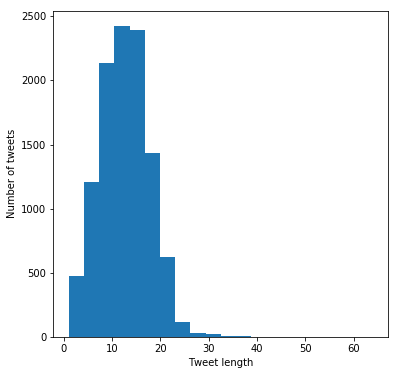

In [35]:
import matplotlib.pyplot as plt
def plot_hist(tweets):
    sentence_lengths = [len(tokens) for tokens in tweets]
    fig = plt.figure(figsize=(6, 6)) 
    plt.xlabel('Tweet length')
    plt.ylabel('Number of tweets')
    plt.hist(sentence_lengths, bins=20)
    plt.show()
    return sentence_lengths
tweet_lengths = plot_hist(tweets)

We can now see that the average tweet has about 12-15 words, and that there are a few with almost 60 words. What exactly is the length of the shortest tweet, the length of the longest tweet, and the average length of all tweets? Print those values out.

In [36]:
# your code here

minimun: 1, maximum: 64, average: 12.59


We are getting to know our data more and more now. Let us dive deeper and see if we can determine if there is a difference in the average length of tweets for relevant and not relevant tweets. Perhaps it can be used as a good feature for future analyis.
  
To do that, we use the `'choose_one'` column in `df_raw`. If the value in the column is 'Relevant', the tweet is classified as relating to a natural disaster. If the value is 'Not Relevant', the tweet does not relate to a natural disaster.  
  
Can you print out the average length of tweet for relevant tweets, and the average length of tweet for not relevant tweets?
  
*Hint: the dataframe `df_result` has been constructed to contain the processed tweets and the relevance. create two dataframes, one containing only 'Relevant' tweets, and one containing only 'Not Relevant' tweets. This can be done by subsetting the dataframe: `df_result[df_result['choose_one']=='Relevant']`. We have given an example of how to do it to create a dataframe of positive examples. Can you create the dataframe of negative examples?  

*Hint 2: To calculate the length of each tweet, you can use the `.apply(len)` function. You can also use `.mean()` to get the mean of the results.

In [38]:
df_result = df_raw['choose_one'].copy().to_frame()
df_result['processed_text'] = tweets
df_neg=df_result[df_result['choose_one']=='Not Relevant']
df_pos=df_result[df_result['choose_one']=='Relevant']
print(df_pos['processed_text'].apply(len).mean(), df_neg['processed_text'].apply(len).mean())

12.904772095013909 12.363827379990303


Do you think tweet length make a good feature?

## Data analysis challenge

Using the skills you have learnt, apply the text processing process on the data you have gathered in the beginning of the notebook (from SL2 website). Use the knowledge of data scraping and text processing you've gathered here. 

Report the initial and final vocabulary size!

In [54]:
# your code here

Initial vocab size 483
Final vocab size 375


We have now learnt:
1. How to look for text data
2. How to collect data online using scrapers and various modules
3. How to save this data onto your computer
4. How to process this text data into a form your computer can understand
5. How to analyze and visualize the processed data

In the next experience module, we will learn how to take what we have learnt and use it to train an NLP model to actually recognize tweets!